## DATA TRAINING

In [1]:
import numpy as np
import pandas as pd
import math
import joblib

from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression

import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("augmented_only.csv")
seed = 33
df

time_Seconds  round_trip  stop     time  elapsed        lat        lon  \
0         29842.0         NaN   5.0  8:17:22     32.0  18.403751 -66.046593   
1         29889.0         NaN   6.0  8:18:09     47.0  18.403879 -66.048199   
2         29948.0         NaN  13.0  8:19:08     59.0  18.403955 -66.049898   
3         29977.0         NaN  24.0  8:19:37     29.0  18.404698 -66.050468   
4         30018.0         NaN  23.0  8:20:18     41.0  18.406440 -66.050140   
..            ...         ...   ...      ...      ...        ...        ...   
370       34836.0      1187.0   2.1  9:40:36    109.0  18.406243 -66.043161   
371       34991.0      1131.0   1.0  9:43:11    155.0  18.407170 -66.041989   
372       35167.0      1087.0   2.2  9:46:07    176.0  18.406243 -66.043161   
373       35304.0      1062.0   3.0  9:48:24    137.0  18.404856 -66.044836   
374       35331.0      1039.0   4.0  9:48:51     27.0  18.403636 -66.045492   

     next_stop  
0          6.0  
1         13.0  
2         24.0  
3         23.0  
4         20.0  
..         ...  
370        1.0  
371        2.2  
372        3.0  
373        4.0  
374        5.0  

[375 rows x 8 columns]

### Predicting time until next stop

In [2]:
#modify if necessary
sub = df[['stop','time_Seconds','elapsed']]
sub = df.dropna()



####
### Testing and training with dif files
####

training = pd.read_csv("augmented_only.csv")
testing = pd.read_csv("cleaned.csv")
sub_testing = testing[['stop','time_Seconds','elapsed']]
sub_testing = sub_testing.dropna()

sub_training = training[['stop','time_Seconds','elapsed']]
sub_training = sub_training.dropna()

X_train = sub_training[['stop','time_Seconds']]
y_train= sub_training['elapsed']

X_test = sub_testing[['stop','time_Seconds']]
y_test = sub_testing['elapsed']



Sample times


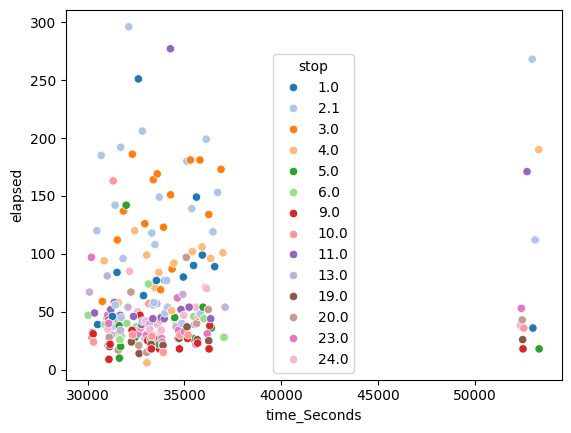

Predicted times


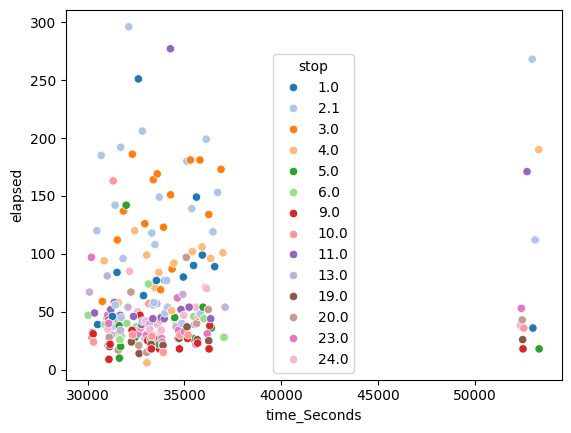

Differences between real and predicted times


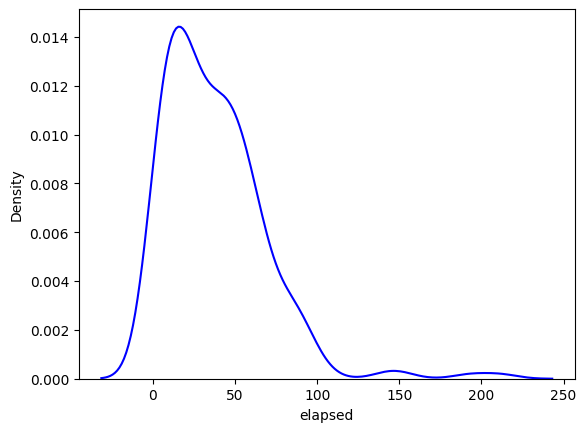

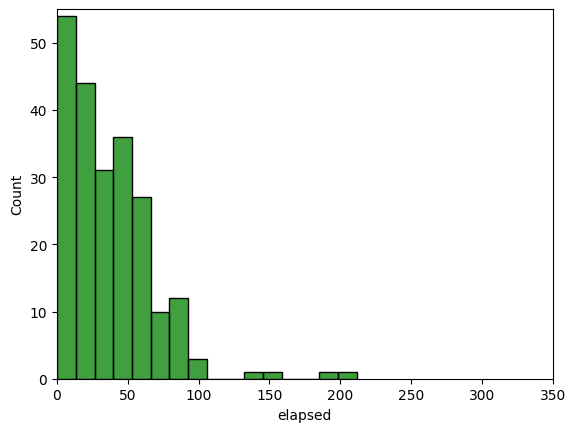

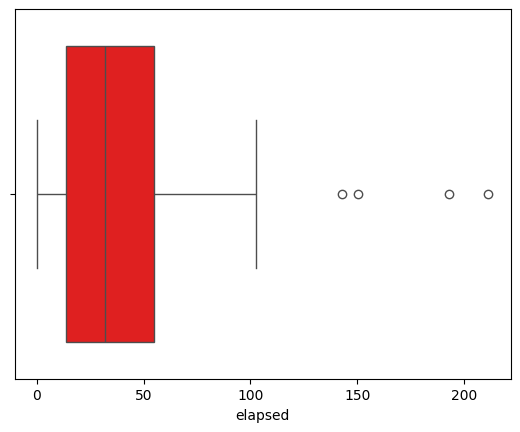

Statistical data
count    221.000000
mean      37.647947
std       31.052375
min        0.230878
25%       13.640652
50%       32.041720
75%       54.684524
max      211.430758
Name: elapsed, dtype: float64


In [3]:

reg = LinearRegression().fit(X_train, y_train)

y_pred = reg.predict(X_test)

#Graph results
pred = X_test
dat = X_test
pred['elapsed']=y_pred
dat['elapsed']=y_test

print("Sample times")
sns.scatterplot(data=dat,x='time_Seconds',y='elapsed',hue='stop',palette="tab20")
plt.show()

print("Predicted times")
sns.scatterplot(data=pred,x='time_Seconds',y='elapsed',hue='stop',palette="tab20")
plt.show()

print("Differences between real and predicted times")

dif = np.abs(y_test - y_pred)
sns.kdeplot(x=dif, color='blue')
plt.show()

sns.histplot(x=dif,color='green')
plt.xlim(0,350)
plt.ylim(0,55)
plt.show()

sns.boxplot(x=dif,color='red')
plt.show()

print("Statistical data")
print(pd.Series(dif).describe())

Sample times


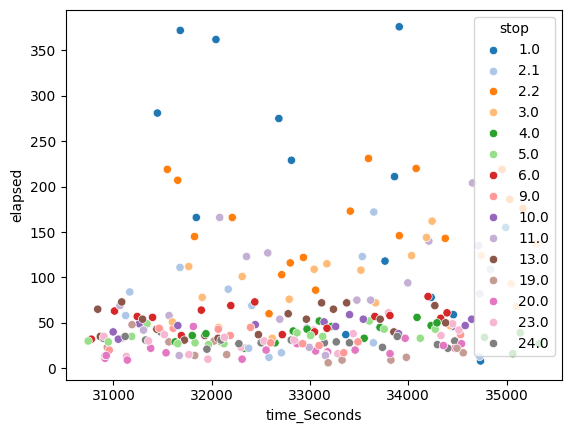

Predicted times


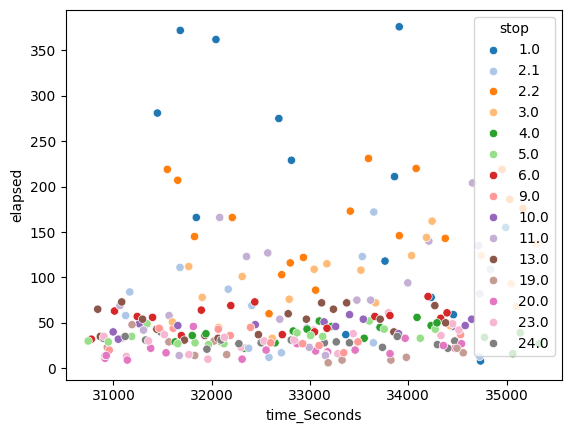

Differences between real and predicted times


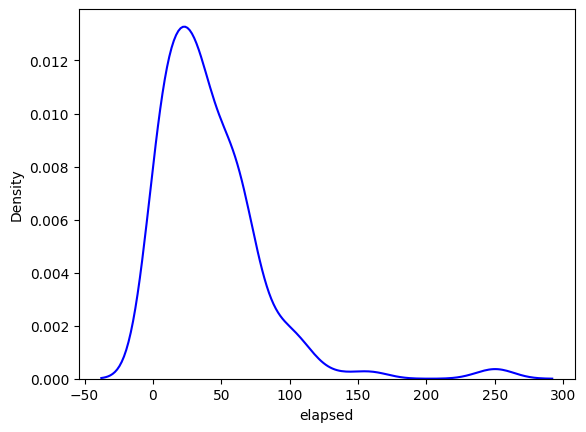

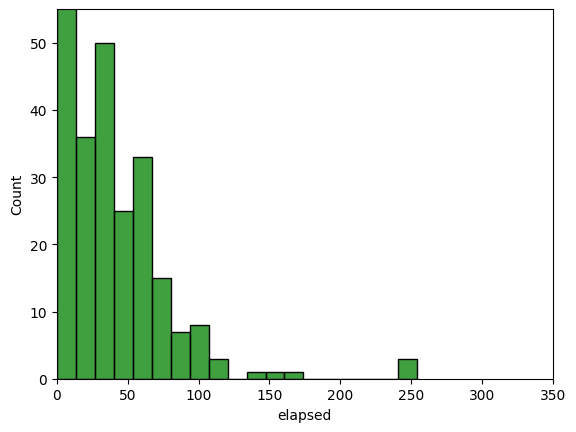

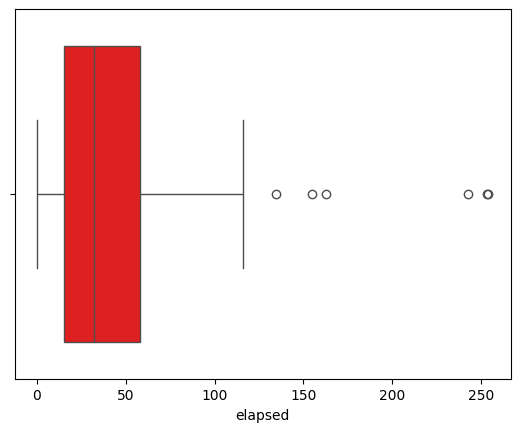

Statistical data
count    240.000000
mean      41.441239
std       37.905309
min        0.240000
25%       15.137285
50%       32.125883
75%       57.991107
max      254.112869
Name: elapsed, dtype: float64


In [4]:

X = sub[['stop','time_Seconds']]
y = sub['elapsed']

#Linear Regression
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.8, random_state=seed)

reg = LinearRegression().fit(X_train, y_train)

y_pred = reg.predict(X_test)

#Graph results
pred = X_test
dat = X_test
pred['elapsed']=y_pred
dat['elapsed']=y_test

print("Sample times")
sns.scatterplot(data=dat,x='time_Seconds',y='elapsed',hue='stop',palette="tab20")
plt.show()

print("Predicted times")
sns.scatterplot(data=pred,x='time_Seconds',y='elapsed',hue='stop',palette="tab20")
plt.show()

print("Differences between real and predicted times")

dif = np.abs(y_test - y_pred)
sns.kdeplot(x=dif, color='blue')
plt.show()

sns.histplot(x=dif,color='green')
plt.xlim(0,350)
plt.ylim(0,55)
plt.show()

sns.boxplot(x=dif,color='red')
plt.show()

print("Statistical data")
print(pd.Series(dif).describe())

In [5]:
#save model
joblib.dump(reg,"model.pkl")

['model.pkl']